In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from scipy.stats import norm
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro

In [2]:
df = pd.read_csv("C:\\Users\\BUDDY\\Downloads\\Fish_dataset.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


### Univariate Analysis

In [3]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### Q.1 Plot a bar chart showing count of individual species?

In [5]:
df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [6]:
df1 = pd.DataFrame(df.Species.value_counts())
df1.T 

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


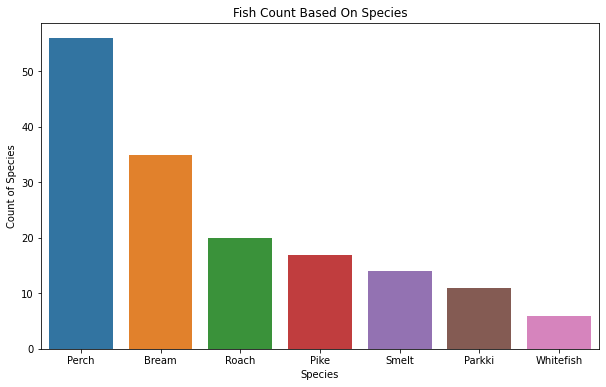

In [8]:
sns.barplot(x= df1.index, y = df1.Species)
plt.xlabel('Species')
plt.ylabel('Count of Species')
plt.rcParams["figure.figsize"] = (12,8)
plt.title('Fish Count Based On Species')
plt.show()

### Bivariate Analysis

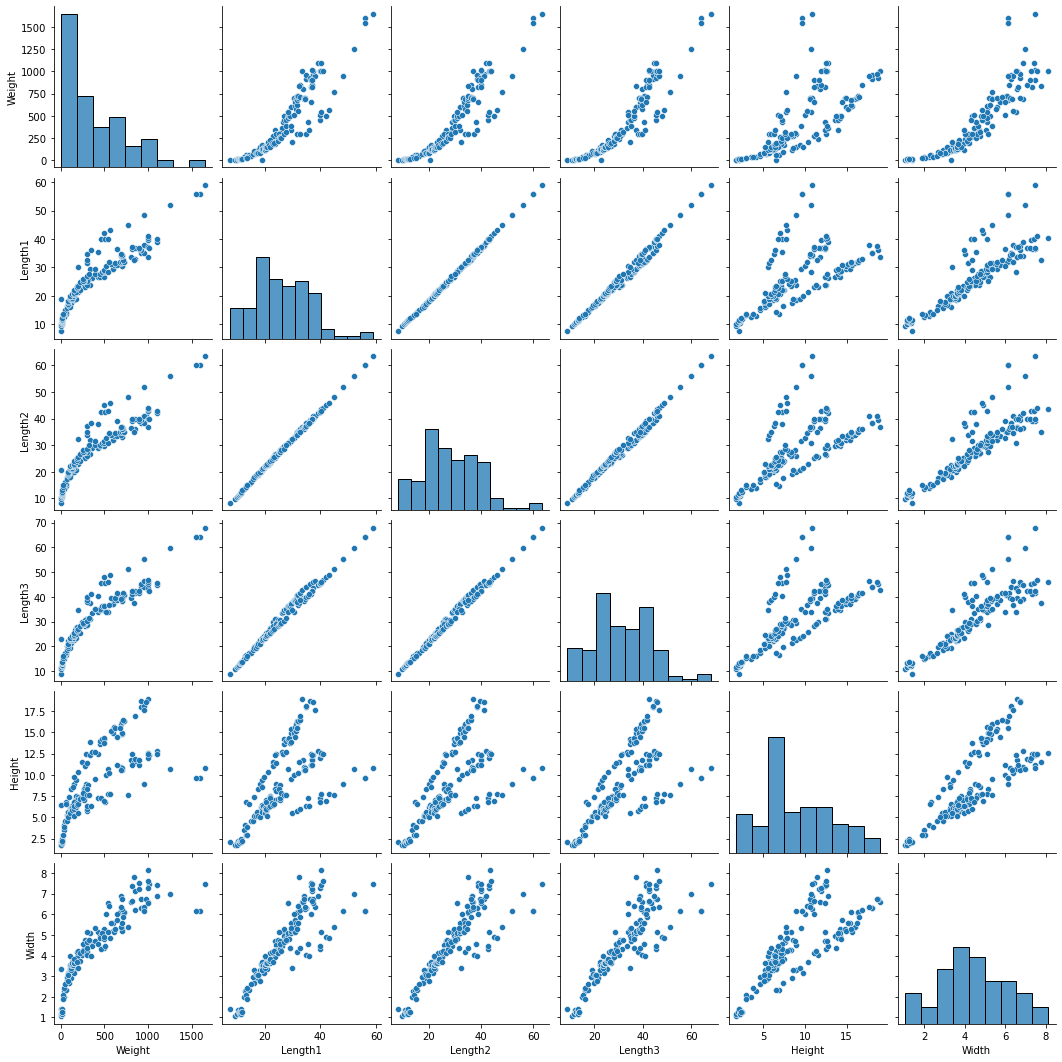

In [9]:
sns.pairplot(df)

### Q.2 Identify outliers and remove if any?

In [10]:
df.describe(percentiles=[0.01,.02,.03,.04,.05,.1,.25,.50,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Weight,159.0,398.326415,357.978317,0.0000,6.364000,7.080000,8.388000,9.732000,9.80000,29.58000,120.00000,273.0000,650.0000,930.0000,1000.00000,1010.200000,1100.000000,1226.000000,1571.000000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,9.706000,10.148000,10.622000,10.960000,11.30000,13.44000,19.05000,25.2000,32.7000,38.2000,41.19000,42.816000,45.710000,51.408000,56.000000,59.000
Length2,159.0,28.415723,10.716328,8.4000,10.206000,10.664000,11.148000,11.460000,11.80000,14.62000,21.00000,27.3000,35.5000,41.2000,44.10000,45.680000,48.962000,55.312000,60.000000,63.400
Length3,159.0,31.227044,11.610246,8.8000,11.264000,11.664000,12.296000,12.760000,13.10000,16.16000,23.15000,29.4000,39.6500,45.3400,46.74000,48.476000,52.214000,58.964000,64.000000,68.000
Height,159.0,8.970994,4.286208,1.7284,1.874056,1.995000,2.088528,2.138880,2.20356,3.76480,5.94480,7.7860,12.3659,15.1904,16.37732,16.770368,17.730984,18.076464,18.685296,18.957
Width,159.0,4.417486,1.685804,1.0476,1.148400,1.160944,1.232426,1.271624,1.28314,2.22784,3.38565,4.2485,5.5845,6.7421,7.28462,7.395668,7.466976,7.491256,7.679758,8.142


In [11]:
df[df.Weight <= 0]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [12]:
df2 = df.drop([40])
print('New dimension of dataset is= ', df2.shape)
df2.head(5)

New dimension of dataset is=  (158, 7)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [13]:
df2.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915719,0.918603,0.923090,0.723857,0.886654
Length1,0.915719,1.000000,0.999516,0.992004,0.624409,0.866684
Length2,0.918603,0.999516,1.000000,0.994083,0.639503,0.873201
Length3,0.923090,0.992004,0.994083,1.000000,0.702655,0.878189
Height,0.723857,0.624409,0.639503,0.702655,1.000000,0.792401
Width,0.886654,0.866684,0.873201,0.878189,0.792401,1.000000


In [14]:
df3 = df2.drop(['Length1', 'Length2', 'Length3'], axis =1) 
print('New dimension of dataset is= ', df2.shape)
df3.head()

New dimension of dataset is=  (158, 7)


,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961
3,Bream,363.0,12.7300,4.4555
4,Bream,430.0,12.4440,5.1340


Text(0.5, 1.0, 'Outlier Detection based on Weight')

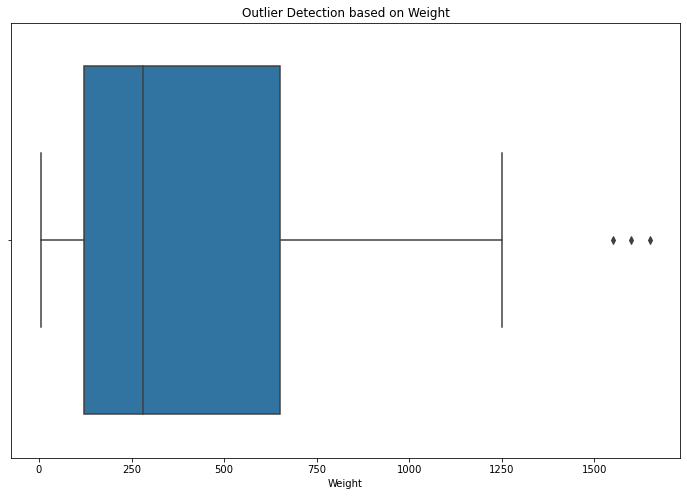

In [15]:
sns.boxplot(x=df3['Weight'])
plt.title('Outlier Detection based on Weight')

In [16]:
def outlier_detection(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1
    upper_end = Q3 + 1.5 * IQR
    lower_end = Q1 - 1.5 * IQR 
    outlier = dataframe[(dataframe > upper_end) | (dataframe < lower_end)]
    return outlier

print(outlier_detection(df2['Weight']))

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64


Text(0.5, 1.0, 'Outlier Detection based on Height')

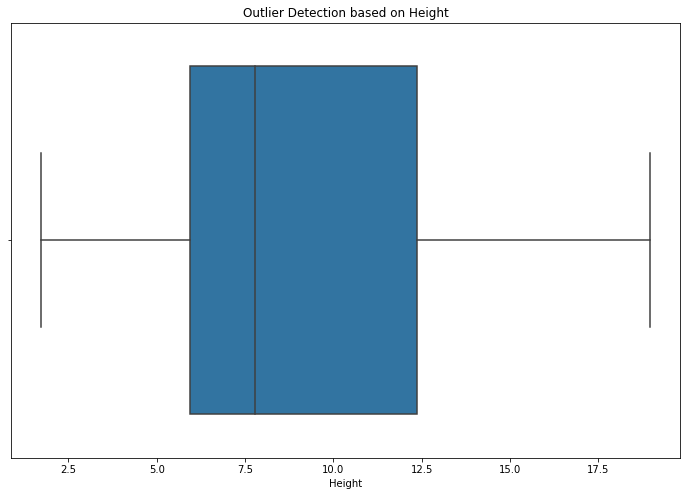

In [17]:
# So based on 'Weight' data, index 142, 143 and 144 are outliers

# Lets check for 'Height' data


sns.boxplot(x =df3['Height'])
plt.title('Outlier Detection based on Height')

Text(0.5, 1.0, 'Outlier Detection based on Width')

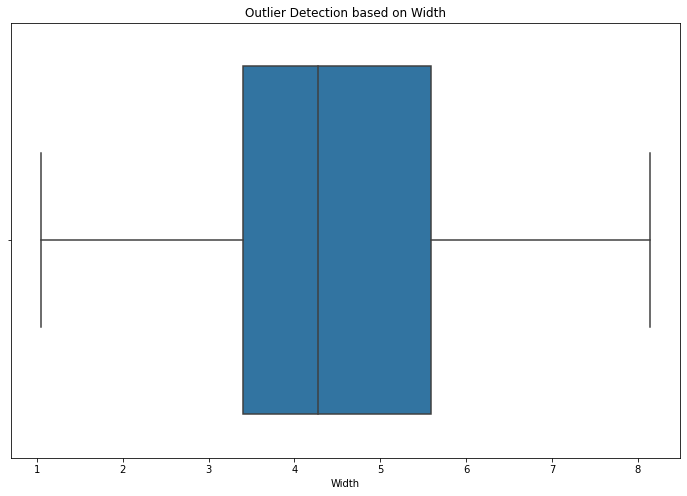

In [18]:
# There is no outlier so no need to call 'outlier_detection()' function.

# Lets check for 'Width' data


sns.boxplot(x = df3['Width'])
plt.title('Outlier Detection based on Width')

# There is no outlier so no need to call 'outlier_detection()' function.

### Outlier Treatment

In [19]:
df4 = df3.drop([142,143,144])
df4.shape

(155, 4)

In [20]:
df4.describe().T


,count,mean,std,min,25%,50%,75%,max
Weight,155.0,377.638065,319.144511,5.9000,120.00000,272.0000,615.00000,1250.000
Height,155.0,8.967102,4.333722,1.7284,5.92695,7.6800,12.37930,18.957
Width,155.0,4.382326,1.675564,1.0476,3.38565,4.2476,5.47275,8.142


### Q.3 Build a regression model and print regression equation?

In [21]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [22]:
fish1=pd.get_dummies(df, columns=["Species"],prefix=["Species"],drop_first=True)

In [23]:
fish1.shape

(159, 12)

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

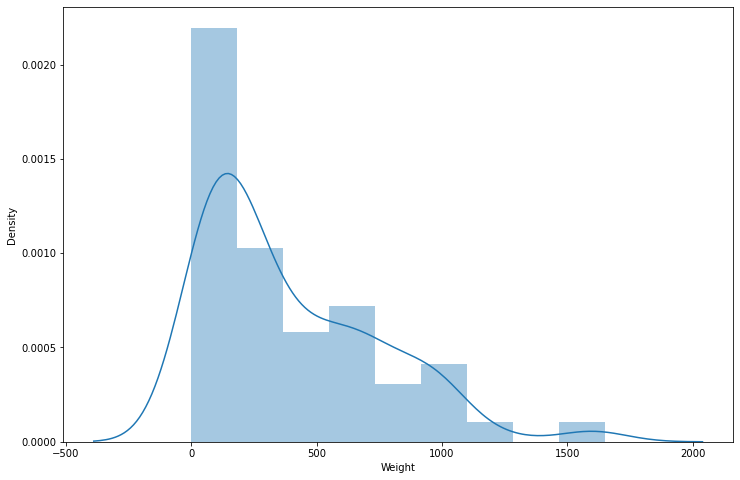

In [24]:
sns.distplot(fish1["Weight"])

In [22]:
shapiro(fish1["Weight"])

ShapiroResult(statistic=0.8834666609764099, pvalue=7.605901464202702e-10)

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

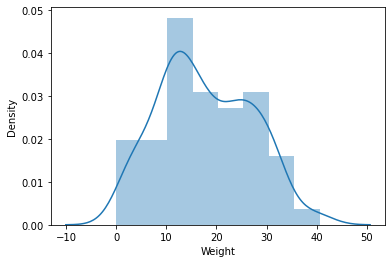

In [23]:
sns.distplot(np.sqrt(fish1['Weight']))

In [24]:
shapiro(np.sqrt(fish1['Weight']))

ShapiroResult(statistic=0.9728937745094299, pvalue=0.0032078714575618505)

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

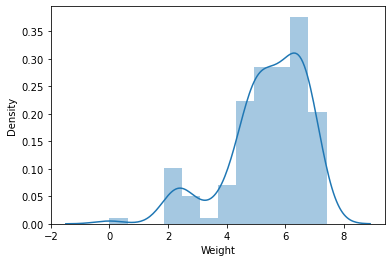

In [25]:
sns.distplot(np.log1p(fish1['Weight']))

In [26]:
shapiro(np.log1p(fish1['Weight']))

ShapiroResult(statistic=0.904837429523468, pvalue=1.1928044330034027e-08)

In [27]:
fish1["Weight_1"]=np.log1p(fish1['Weight'])

In [28]:
fish1.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach',
       'Species_Smelt', 'Species_Whitefish', 'Weight_1'],
      dtype='object')

In [25]:
import statsmodels.api as sm

In [28]:
y=fish1["Weight_1"]
X=fish1[['Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach',
       'Species_Smelt', 'Species_Whitefish']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=88)
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)

F:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
print(X_train.shape)

print(X_test.shape)

(111, 12)
(48, 12)


In [30]:
y=fish1["Weight_1"]
X=fish1[['Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach',
       'Species_Smelt', 'Species_Whitefish']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=88)
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)
model1=sm.OLS(y_train, X_train).fit()

In [31]:
model1=sm.OLS(y_train, X_train).fit()

In [32]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               Weight_1   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     72.57
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           2.52e-42
Time:                        13:05:32   Log-Likelihood:                -71.476
No. Observations:                 111   AIC:                             167.0
Df Residuals:                      99   BIC:                             199.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.4131      0.83

### Q.5 Compare real and predicted weights and give a conclusion statement based on it?

In [33]:
Predicted=np.exp(model1.predict(X_train))
y_act=np.exp(y_train)

In [34]:
print("MSE", np.mean(np.square(y_act-Predicted)))
print("RMSE", np.sqrt(np.mean(np.square(y_act-Predicted) )))
print("MAE", np.mean(abs(y_act-Predicted) ))  
print("MAPE", np.mean(abs((y_act-Predicted)/y_act ))) 

MSE 22610.986856967564
RMSE 150.36950108638243
MAE 57.37666362258616
MAPE 0.8588029549784016


In [35]:
Predictedt=np.exp(model1.predict(X_test))
y_actt=np.exp(y_test)

In [36]:
print("MSE", np.mean(np.square(y_actt-Predictedt)))
print("RMSE", np.sqrt(np.mean(np.square(y_actt-Predictedt) )))
print("MAE", np.mean(abs(y_actt-Predictedt) ))  
print("MAPE", np.mean(abs((y_actt-Predictedt)/y_actt )))  

MSE 6594.509932372729
RMSE 81.20658798627565
MAE 51.64551082564725
MAPE 0.21843216983959923


### CONCLUSION

### As you can see from above results our model score is 89%, which is good enough to start with.

#### Comparing the train and test dataset result we can conclude that the model is overfit